In [ ]:
!pip install -U deep-translator

In [ ]:
!pip install nltk

In [ ]:
from deep_translator import GoogleTranslator

import nltk
import os
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import numpy as np
from gensim.models import Nmf
from gensim.models.ldamodel import LdaModel
from gensim.models import LsiModel
from gensim.models import HdpModel
from gensim.models import LdaMulticore
from gensim.models import EnsembleLda
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import gensim
import gensim.corpora as corpora
from gensim.models import Phrases
from gensim.utils import simple_preprocess
from gensim.corpora.dictionary import Dictionary
from gensim.utils import tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
nltk.download('wordnet')
import re
import json
import string
from bs4 import BeautifulSoup
from gensim.parsing.preprocessing import (
    strip_non_alphanum,
    split_alphanum,
    strip_short,
    strip_numeric
)
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
datafile = 'support_tickets.csv'
data = pd.read_csv(datafile)

In [ ]:
data.head(20)

,LOGICIEL,CRITICITE,ID TICKET,TYPE TICKET,PRIORITE,SUJET,STATUT,DATE SIGNALISATION,ETAT REVERSEMENT,VERSION INCLUANT LE REVERSEMENT
0,KVM,Non-critique,34,Demande d'information,Non bloquant,Configuration réseaux vlans différents,9 - Fermé,11/26/2012 9:58,NaN,NaN
1,Maarch Enterprise,Non-critique,62,Anomalie,Non bloquant,Gestion des versions d'un document enregistré ...,9 - Fermé,12/6/2012 17:25,Accepté sans modification,1.3
2,Maarch Enterprise,Non-critique,63,Anomalie,Bloquant,Création de document impossible derriere proxy,10 - Abandonné,12/6/2012 17:30,NaN,NaN
3,Maarch Enterprise,Non-critique,64,Anomalie,Bloquant,Impossibilité d'utiliser la fonctionnalité de ...,9 - Fermé,12/6/2012 17:33,NaN,NaN
4,Maarch Enterprise,Non-critique,65,Anomalie,Non bloquant,Suppression de Corbeille,9 - Fermé,12/6/2012 17:36,Accepté sans modification,1.3
5,Maarch Enterprise,Non-critique,67,Anomalie,Non bloquant,Soucis de prise en compte d'un statut spécifiq...,9 - Fermé,12/7/2012 9:21,Accepté sans modification,NaN
6,Maarch Enterprise,Non-critique,68,Demande d'information,Non bloquant,Mise en oeuvre protocole HTTPS,9 - Fermé,12/7/2012 9:24,NaN,NaN
7,Maarch Enterprise,Non-critique,69,Demande d'information,Non bloquant,Création de collection supplémentaire & Mise e...,9 - Fermé,12/7/2012 9:27,NaN,NaN
8,Maarch Enterprise,Non-critique,72,Anomalie,Non bloquant,Anomalie sur deconnexion,9 - Fermé,12/11/2012 17:45,NaN,NaN
9,Maarch Enterprise,Non-critique,82,Anomalie,Non bloquant,Génération des n° de chrono courrier départ et...,9 - Fermé,12/13/2012 9:41,Accepté sans modification,1.3


In [ ]:
def translate_comment(x):
    try:
        # Try to translate the string version of the comment
        return GoogleTranslator(source='auto', target='en').translate(str(x))
    except:
        # If there is an exception just return the TextBlob version of the input
        return str(x)

In [ ]:
data['body'] = data['SUJET'].apply(translate_comment)

In [ ]:
data['body'].head(20)

0                   Configuring different vlan networks
1     Version management of a saved document: access...
2             Document creation impossible behind proxy
3     Impossible to use the document generation func...
4                                        Deleting Trash
5     Concerns about taking into account a specific ...
6                         HTTPS protocol implementation
7       Additional Collection Creation & Implementation
8                              Anomaly on disconnection
9     Generation of outgoing and internal mail chron...
10                                      advanced search
11    Setting up a VLAN on a bridge using a physical...
12                          Recording of chrono numbers
13    CALC file causing problem in LibreOffice V3.5....
14                Mail notification: recipients in copy
15                                         User deleted
16    Indexing & Qualification of a document with ch...
17           Incorrect configuration file loadin

In [ ]:
def parse_html(text, parser="html.parser"):
    soup = BeautifulSoup(text, parser)
    soup = remove_html_tags(soup)
    text = remove_multiple_space(soup.get_text()).strip()
    return text


def parse_html_v2(text, loop=2, parser="html.parser"):
    if not text:
        text = ""
    # some contents still have html code after first parse
    # loop solved problem
    for _ in range(loop):
        soup = BeautifulSoup(text, parser)
        text = soup.get_text()
    text = remove_multiple_space(text)
    return text


def remove_links_content(text):
    text = re.sub(r"http\S+", "", text)
    return text


def remove_emails(text):
    return re.sub('\S*@\S*\s?', '', text)  # noqa


def remove_punctuation(text):
    """https://stackoverflow.com/a/37221663"""
    table = str.maketrans({key: None for key in string.punctuation})
    return text.translate(table)


def remove_special_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('{.*?}')
    return re.sub(clean, '', text)


def preprocess_text(text):
    text = parse_html_v2(text)
    text = text.lower()
    text = remove_links_content(text)
    text = remove_emails(text)
    text = remove_special_tags(text)  # remove content between {}
    text = remove_punctuation(text)  # remove all puntuations
    text = split_alphanum(text)  # add space between word and numeric
    text = strip_numeric(text)  # remove digits
    text = strip_non_alphanum(text)  # remove non-alphabetic characters
    text = strip_short(text, minsize=2)  # remove word with length  <  minsize
    text = remove_multiple_space(text).strip()  # remove space and strip
    #text = tokenize(text)
    return text


def remove_multiple_space(text):
    return re.sub("\s\s+", " ", text)  # noqa


def remove_html_tags(soup,
                     tags=["script", "style"],
                     get_text=False):
    for tag in tags:
        for sample in soup.find_all(tag):
            sample.replaceWith('')

    if get_text:
        return soup.get_text()
    return soup

In [ ]:
data['body'] =data["body"].map(lambda x: preprocess_text(x))

<ipython-input-86-9c3902e42405>:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, parser)


In [ ]:
lemmatizer = WordNetLemmatizer()
data['Lemma_body'] = data["body"].map(lambda x: lemmatizer.lemmatize(x))

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


x = data['Lemma_body'].values.tolist()
docs = list(sent_to_words(x))
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

In [ ]:
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [ ]:
#Remove rare & common tokens
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 57
Number of documents: 517
[[]]


In [ ]:
# Set parameters.
num_topics = 10
chunksize = 500
passes = 20
iterations = 400
eval_every = 1

# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Label'] = LE.fit_transform(data['LOGICIEL'])

In [ ]:
from sklearn.metrics import accuracy_score
def getLDAModelAccuracy(model, corpus, dataset, Label):
  get_document_topics = [model.get_document_topics(item) for item in corpus]
  np_array_of_objects = np.asarray(get_document_topics, dtype="object")
  pred_df = pd.DataFrame(columns=['pred_label'])
  length = len(pd.DataFrame(np_array_of_objects)[0])
  dict_list = []
  for i in range(0,length):
    count=len(pd.DataFrame(np_array_of_objects)[0][i])
    max=0
    for j in range(0,count):
      if(max < (pd.DataFrame(np_array_of_objects)[0][i])[j][1]):
        max=(pd.DataFrame(np_array_of_objects)[0][i])[j][1]
        label=(pd.DataFrame(np_array_of_objects)[0][i])[j][0]
    row_dict = {'pred_label': label}
    dict_list.append(row_dict)
  pred_df = pd.DataFrame.from_dict(dict_list)
  y_pred = pred_df['pred_label'].values
  y_true = dataset['Label'].values
  return(accuracy_score(y_true, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
def getModelAccuracy(model, corpus, dataset, Label):
  get_document_topics=model.__getitem__(corpus)
  #np_array_of_objects = np.asarray(get_document_topics, dtype="object")
  pred_df = pd.DataFrame(columns=['pred_label'])
  length = len(get_document_topics)
  dict_list = []
  for i in range(0,length):
    count=len(get_document_topics[i])
    maxvalue=0
    maxlabel=""
    for j in range(0,count):
      if(maxvalue < int(get_document_topics[i][j][1] or 0)):
        maxvalue=get_document_topics[i][j][1]
        maxlabel=get_document_topics[i][j][0]
    row_dict = {'pred_label': maxlabel}
    dict_list.append(row_dict)
  pred_df = pd.DataFrame.from_dict(dict_list)
  y_pred = pred_df['pred_label'].values
  y_true = dataset['Label'].values
  return(accuracy_score(y_true, y_pred))

In [ ]:
#nmf model
nmf_model = Nmf(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       w_max_iter=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 10 topics
print(nmf_model.print_topics())

[(0, '0.291*"migration" + 0.226*"icasso" + 0.104*"to_icasso" + 0.076*"to" + 0.073*"problem" + 0.037*"error" + 0.031*"after" + 0.029*"when" + 0.027*"server" + 0.027*"during"'), (1, '0.129*"calendar" + 0.122*"unable_to" + 0.122*"unable" + 0.096*"administration" + 0.088*"group" + 0.082*"user" + 0.066*"no" + 0.042*"to" + 0.036*"obm" + 0.035*"servers"'), (2, '0.296*"for" + 0.189*"and" + 0.098*"an" + 0.057*"agenda" + 0.054*"file" + 0.048*"error" + 0.045*"search" + 0.028*"display" + 0.022*"with" + 0.020*"the"'), (3, '0.172*"not" + 0.138*"when" + 0.098*"groups" + 0.070*"is" + 0.069*"with" + 0.046*"deleting" + 0.040*"ldap" + 0.036*"contacts" + 0.036*"versions" + 0.035*"error"'), (4, '0.467*"does_not" + 0.165*"not" + 0.157*"does" + 0.088*"version" + 0.026*"the" + 0.021*"libreoffice" + 0.014*"administration" + 0.010*"after" + 0.009*"update" + 0.007*"contact"'), (5, '0.246*"problem" + 0.202*"obm" + 0.153*"opush" + 0.067*"calendar" + 0.066*"contact" + 0.066*"with" + 0.046*"agenda" + 0.026*"appointm

In [ ]:
(nmf_model.__getitem__(corpus)[18])

[(2, 0.533926773541621), (3, 0.38174701896095825), (6, 0.0843262074974207)]

In [ ]:
getModelAccuracy(nmf_model,corpus,data,"Label")

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
c_v_coherence_model_nmf = CoherenceModel(model=nmf_model, texts=docs, dictionary=dictionary, coherence='c_v')
c_v_coherence_nmf = c_v_coherence_model_nmf.get_coherence()
print('\nC_V Coherence Score: ', c_v_coherence_nmf)


C_V Coherence Score:  0.44841899236125576


In [ ]:
u_mass_coherence_model_nmf = CoherenceModel(model=nmf_model, texts=docs, dictionary=dictionary, coherence='u_mass')
u_mass_coherence_nmf = u_mass_coherence_model_nmf.get_coherence()
print('\nU_Mass Coherence Score: ', u_mass_coherence_nmf)


U_Mass Coherence Score:  -12.64174320635283


In [ ]:
c_uci_coherence_model_nmf = CoherenceModel(model=nmf_model, texts=docs, dictionary=dictionary, coherence='c_uci')
c_uci_coherence_nmf = c_uci_coherence_model_nmf.get_coherence()
print('\nc_uci Coherence Score: ', c_uci_coherence_nmf)


c_uci Coherence Score:  -9.724874985480072


In [ ]:
c_npmi_coherence_model_nmf = CoherenceModel(model=nmf_model, texts=docs, dictionary=dictionary, coherence='c_npmi')
c_npmi_coherence_nmf = c_npmi_coherence_model_nmf.get_coherence()
print('\c_npmi_Coherence Score: ', c_npmi_coherence_nmf)

\c_npmi_Coherence Score:  -0.30665231666849724


In [ ]:
#lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 10 topics
print(lda_model.print_topics())

[(0, '0.208*"to" + 0.188*"and" + 0.148*"during" + 0.119*"for" + 0.084*"when" + 0.080*"deleting" + 0.079*"problem" + 0.076*"opush" + 0.001*"on" + 0.000*"servers"'), (1, '0.239*"with" + 0.163*"groups" + 0.111*"problem" + 0.102*"versions" + 0.100*"all" + 0.089*"by" + 0.059*"migration" + 0.056*"icasso" + 0.023*"to_icasso" + 0.016*"to"'), (2, '0.153*"document" + 0.113*"file" + 0.110*"to" + 0.102*"search" + 0.080*"list" + 0.080*"contacts" + 0.067*"libreoffice" + 0.057*"unable" + 0.057*"unable_to" + 0.057*"type"'), (3, '0.247*"version" + 0.190*"mimo" + 0.174*"not" + 0.158*"does_not" + 0.057*"does" + 0.045*"are" + 0.031*"the" + 0.030*"libreoffice" + 0.021*"in" + 0.005*"after"'), (4, '0.297*"update" + 0.178*"group" + 0.176*"the" + 0.162*"by" + 0.105*"error" + 0.042*"migration" + 0.001*"ldap" + 0.001*"groups" + 0.001*"when" + 0.001*"an"'), (5, '0.230*"in" + 0.131*"administration" + 0.125*"calendar" + 0.109*"obm" + 0.106*"server" + 0.086*"user" + 0.074*"no" + 0.058*"trash" + 0.021*"after" + 0.002

In [ ]:
getLDAModelAccuracy(lda_model,corpus,data,"Label")

0.009671179883945842

In [ ]:
c_v_coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
c_v_coherence_lda = c_v_coherence_model_lda.get_coherence()
print('\nC_V Coherence Score: ', c_v_coherence_lda)


C_V Coherence Score:  0.3838488576959912


In [ ]:
u_mass_coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='u_mass')
u_mass_coherence_lda = u_mass_coherence_model_lda.get_coherence()
print('\nU_Mass Coherence Score: ', u_mass_coherence_lda)


U_Mass Coherence Score:  -10.542881670372942


In [ ]:
c_uci_coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_uci')
c_uci_coherence_lda = c_uci_coherence_model_lda.get_coherence()
print('\nc_uciCoherence Score: ', c_uci_coherence_lda)


c_uciCoherence Score:  -7.90307783630729


In [ ]:
c_npmi_coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_npmi')
c_npmi_coherence_lda = c_npmi_coherence_model_lda.get_coherence()
print('\c_npmi_Coherence Score: ', c_npmi_coherence_lda)

\c_npmi_Coherence Score:  -0.24505378467462718


In [ ]:
lsi_model = LsiModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print(lsi_model.print_topics())

[(0, '0.845*"the" + 0.249*"in" + 0.221*"does_not" + 0.188*"on" + 0.163*"to" + 0.135*"not" + 0.109*"version" + 0.095*"migration" + 0.095*"and" + 0.084*"icasso"'), (1, '-0.782*"does_not" + -0.297*"not" + -0.262*"does" + 0.237*"to" + 0.219*"migration" + 0.165*"icasso" + -0.148*"version" + 0.144*"the" + 0.120*"problem" + 0.111*"in"'), (2, '0.460*"to" + 0.459*"migration" + 0.388*"icasso" + -0.384*"the" + 0.291*"does_not" + 0.251*"problem" + 0.178*"to_icasso" + 0.120*"not" + 0.115*"server" + 0.105*"on"'), (3, '0.812*"on" + 0.311*"in" + -0.229*"the" + -0.181*"migration" + -0.148*"to" + 0.145*"opush" + -0.131*"does_not" + 0.118*"problem" + 0.115*"file" + -0.111*"icasso"'), (4, '-0.872*"in" + 0.384*"on" + 0.161*"the" + 0.115*"to" + -0.084*"file" + -0.074*"not" + 0.058*"opush" + 0.057*"problem" + -0.055*"an" + -0.051*"ldap"'), (5, '0.521*"to" + -0.384*"migration" + 0.332*"obm" + -0.283*"icasso" + 0.252*"with" + 0.171*"when" + 0.171*"unable" + 0.171*"unable_to" + 0.169*"contact" + 0.138*"not"'), 

In [ ]:
getModelAccuracy(lsi_model,corpus,data,"Label")

AttributeError: 'LsiModel' object has no attribute 'get_document_topics'

In [ ]:
c_v_coherence_model_lsi = CoherenceModel(model=lsi_model, texts=docs, dictionary=dictionary, coherence='c_v')
c_v_coherence_lsi = c_v_coherence_model_lsi.get_coherence()
print('\nC_V Coherence Score: ', c_v_coherence_lsi)


C_V Coherence Score:  0.37423558651330846


In [ ]:
u_mass_coherence_model_lsi = CoherenceModel(model=lsi_model, texts=docs, dictionary=dictionary, coherence='u_mass')
u_mass_coherence_lsi = u_mass_coherence_model_lsi.get_coherence()
print('\nu_mass Coherence Score: ', u_mass_coherence_lsi)


u_mass Coherence Score:  -10.978855309874522


In [ ]:
c_uci_coherence_model_lsi = CoherenceModel(model=lsi_model, texts=docs, dictionary=dictionary, coherence='c_uci')
c_uci_coherence_lsi = c_uci_coherence_model_lsi.get_coherence()
print('\nc_uci Coherence Score: ', c_uci_coherence_lsi)


c_uci Coherence Score:  -8.15230425904074


In [ ]:
c_npmi_coherence_model_lsi = CoherenceModel(model=lsi_model, texts=docs, dictionary=dictionary, coherence='c_npmi')
c_npmi_coherence_lsi = c_npmi_coherence_model_lsi.get_coherence()
print('\nc_npmi Coherence Score: ', c_npmi_coherence_lsi)


c_npmi Coherence Score:  -0.25202827302115804


In [ ]:
#hdp model
hdp_model = HdpModel(corpus=corpus, id2word=id2word, chunksize=chunksize)
# Print the Keyword in the 10 topics
print(hdp_model.print_topics())

[(0, '0.072*icasso + 0.068*to_icasso + 0.047*trash + 0.046*group + 0.046*version + 0.042*for + 0.042*does_not + 0.038*no + 0.030*opush + 0.030*agenda'), (1, '0.072*to_icasso + 0.069*contact + 0.068*to + 0.065*deleting + 0.055*document + 0.040*not + 0.039*management + 0.034*servers + 0.034*icasso + 0.031*administration'), (2, '0.102*agenda + 0.096*obm + 0.070*migration + 0.061*when + 0.048*and + 0.044*does + 0.035*problem + 0.035*does_not + 0.034*no + 0.032*servers'), (3, '0.106*contact + 0.052*server + 0.050*not + 0.048*is + 0.046*type + 0.035*no + 0.033*file + 0.032*to + 0.032*servers + 0.031*obm'), (4, '0.103*servers + 0.059*administration + 0.047*opush + 0.046*does_not + 0.045*an + 0.044*user + 0.042*contact + 0.039*on + 0.035*display + 0.034*deleting'), (5, '0.087*an + 0.060*for + 0.048*by + 0.045*opush + 0.039*to + 0.034*not + 0.031*no + 0.028*group + 0.028*the + 0.028*type'), (6, '0.100*document + 0.069*servers + 0.067*account + 0.058*appointment + 0.056*ldap + 0.054*and + 0.048*

In [ ]:
getModelAccuracy(hdp_model,corpus,data,"Label")

0.0

In [ ]:
c_v_coherence_model_hdp = CoherenceModel(model=hdp_model, texts=docs, dictionary=dictionary, coherence='c_v')
c_v_coherence_hdp = c_v_coherence_model_hdp.get_coherence()
print('\nC_V Coherence Score: ', c_v_coherence_hdp)


C_V Coherence Score:  0.5183683027165912


In [ ]:
u_mass_coherence_model_hdp = CoherenceModel(model=hdp_model, texts=docs, dictionary=dictionary, coherence='u_mass')
u_mass_coherence_hdp = u_mass_coherence_model_hdp.get_coherence()
print('\nu_mass Coherence Score: ', u_mass_coherence_hdp)


u_mass Coherence Score:  -14.38932313920938


In [ ]:
c_uci_coherence_model_hdp = CoherenceModel(model=hdp_model, texts=docs, dictionary=dictionary, coherence='c_uci')
c_uci_coherence_hdp = c_uci_coherence_model_hdp.get_coherence()
print('\nc_uci Coherence Score: ', c_uci_coherence_hdp)


c_uci Coherence Score:  -11.491088750250013


In [ ]:
c_npmi_coherence_model_hdp = CoherenceModel(model=hdp_model, texts=docs, dictionary=dictionary, coherence='c_npmi')
c_npmi_coherence_hdp = c_npmi_coherence_model_hdp.get_coherence()

print('\nc_npmi Coherence Score: ', c_npmi_coherence_hdp)


c_npmi Coherence Score:  -0.38544181790380144


In [ ]:
#lda multicore model
lda_multicore_model = LdaMulticore(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 10 topics
print(lda_multicore_model.print_topics())

[(0, '0.512*"during" + 0.243*"does_not" + 0.088*"does" + 0.080*"not" + 0.008*"file" + 0.002*"on" + 0.001*"in" + 0.001*"the" + 0.001*"error" + 0.001*"libreoffice"'), (1, '0.302*"the" + 0.193*"version" + 0.147*"mimo" + 0.147*"field" + 0.057*"administration" + 0.050*"management" + 0.050*"user" + 0.020*"trash" + 0.001*"contact" + 0.001*"no"'), (2, '0.343*"groups" + 0.129*"by" + 0.070*"ldap" + 0.070*"all" + 0.067*"group" + 0.066*"the" + 0.064*"when" + 0.063*"with" + 0.058*"update" + 0.057*"problem"'), (3, '0.198*"with" + 0.192*"problem" + 0.151*"on" + 0.135*"and" + 0.133*"versions" + 0.107*"servers" + 0.054*"file" + 0.001*"document" + 0.001*"libreoffice" + 0.001*"contact"'), (4, '0.329*"for" + 0.244*"opush" + 0.132*"document" + 0.131*"an" + 0.049*"account" + 0.039*"type" + 0.024*"display" + 0.001*"the" + 0.001*"on" + 0.001*"administration"'), (5, '0.191*"agenda" + 0.168*"when" + 0.147*"appointment" + 0.143*"deleting" + 0.137*"update" + 0.122*"problem" + 0.058*"search" + 0.001*"an" + 0.001*"

In [ ]:
getLDAModelAccuracy(lda_multicore_model,corpus,data,"Label")

0.01160541586073501

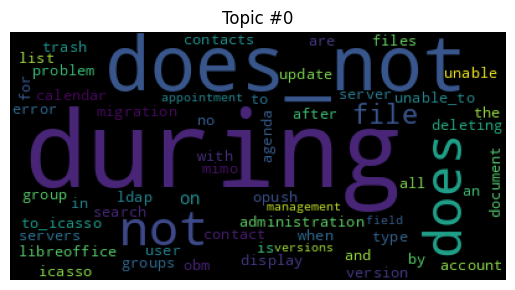

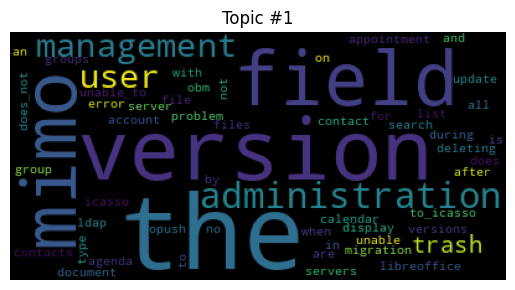

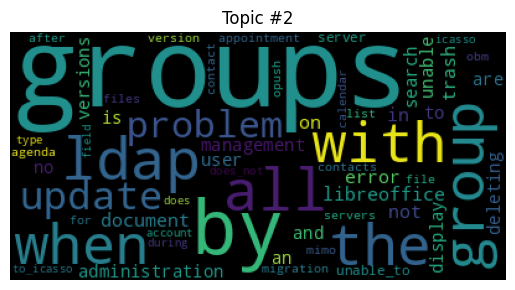

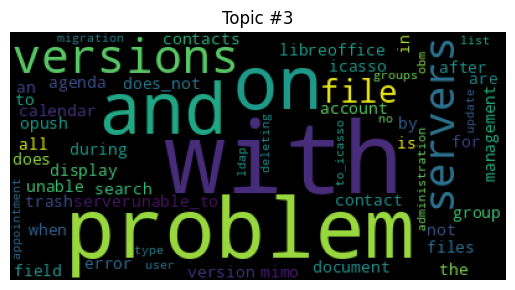

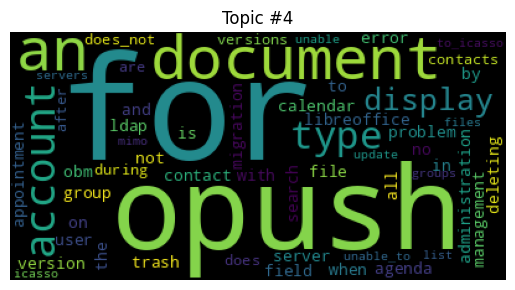

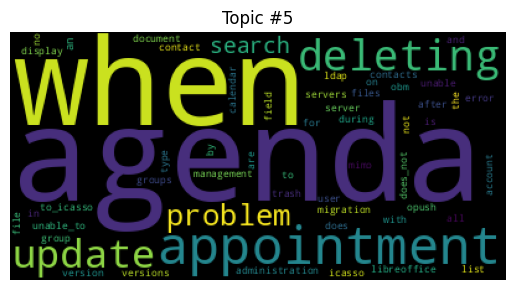

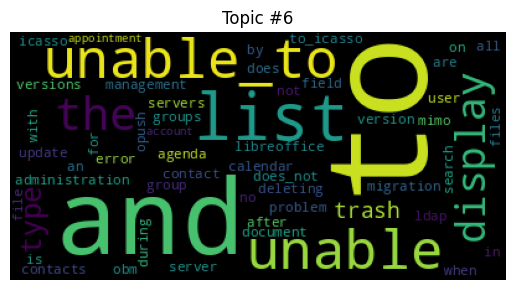

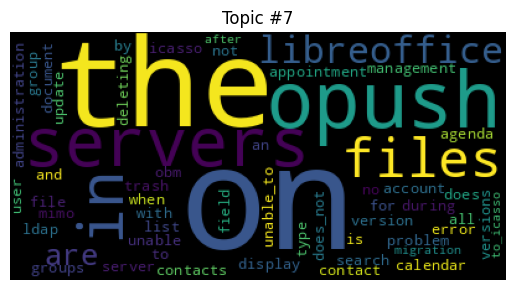

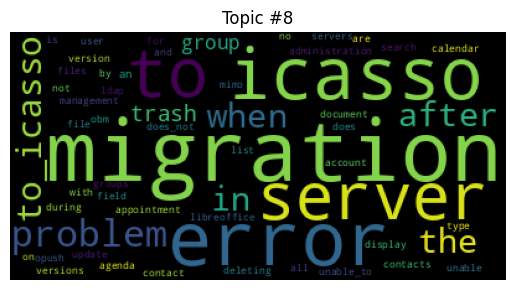

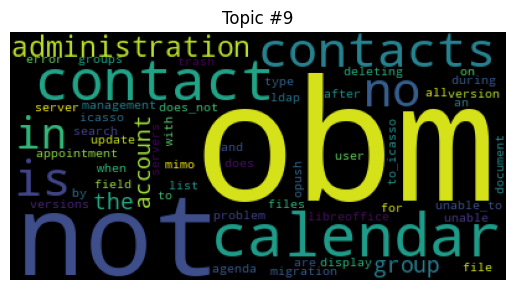

In [ ]:
for t in range(lda_multicore_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_multicore_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [ ]:
c_v_coherence_model_lda_multicore = CoherenceModel(model=lda_multicore_model, texts=docs, dictionary=dictionary, coherence='c_v')
c_v_coherence_lda_multicore = c_v_coherence_model_lda_multicore.get_coherence()
print('\nC_V Coherence Score: ', c_v_coherence_lda_multicore)


C_V Coherence Score:  0.38947770593995956


In [ ]:
u_mass_coherence_model_lda_multicore = CoherenceModel(model=lda_multicore_model, texts=docs, dictionary=dictionary, coherence='u_mass')
u_mass_coherence_lda_multicore = u_mass_coherence_model_lda_multicore.get_coherence()
print('\nu_mass Coherence Score: ', u_mass_coherence_lda_multicore)


u_mass Coherence Score:  -10.631542940084218


In [ ]:
c_uci_coherence_model_lda_multicore = CoherenceModel(model=lda_multicore_model, texts=docs, dictionary=dictionary, coherence='c_uci')
c_uci_coherence_lda_multicore = c_uci_coherence_model_lda_multicore.get_coherence()
print('\nc_uci Coherence Score: ', c_uci_coherence_lda_multicore)


c_uci Coherence Score:  -8.06658461454705


In [ ]:
c_npmi_coherence_model_lda_multicore = CoherenceModel(model=lda_multicore_model, texts=docs, dictionary=dictionary, coherence='c_npmi')
c_npmi_coherence_lda_multicore = c_npmi_coherence_model_lda_multicore.get_coherence()
print('\nc_npmi Coherence Score: ', c_npmi_coherence_lda_multicore)


c_npmi Coherence Score:  -0.2578194782838865


In [ ]:
#ensemble lda
ensemble_lda_model = EnsembleLda(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

In [ ]:
getModelAccuracy(ensemble_lda_model,corpus,data,"Label")

0.0

In [ ]:
c_v_coherence_model_ensemble_lda = CoherenceModel(model=ensemble_lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
c_v_coherence_ensemble_lda = c_v_coherence_model_ensemble_lda.get_coherence()
print('\nC_V Coherence Score: ', c_v_coherence_ensemble_lda)


C_V Coherence Score:  0.3808095008560116


In [ ]:
u_mass_coherence_model_ensemble_lda = CoherenceModel(model=ensemble_lda_model, texts=docs, dictionary=dictionary, coherence='u_mass')
u_mass_coherence_ensemble_lda = u_mass_coherence_model_ensemble_lda.get_coherence()
print('\nu_mass Coherence Score: ', u_mass_coherence_ensemble_lda)


u_mass Coherence Score:  -10.339625585982969


In [ ]:
c_uci_coherence_model_ensemble_lda = CoherenceModel(model=ensemble_lda_model, texts=docs, dictionary=dictionary, coherence='c_uci')
c_uci_coherence_ensemble_lda = c_uci_coherence_model_ensemble_lda.get_coherence()
print('\nc_uci Coherence Score: ', c_uci_coherence_ensemble_lda)


c_uci Coherence Score:  -7.81692335297561


In [ ]:
c_npmi_coherence_model_ensemble_lda = CoherenceModel(model=ensemble_lda_model, texts=docs, dictionary=dictionary, coherence='c_npmi')
c_npmi_coherence_ensemble_lda = c_npmi_coherence_model_ensemble_lda.get_coherence()
print('\nc_npmi Coherence Score: ', c_npmi_coherence_ensemble_lda)


c_npmi Coherence Score:  -0.2545651122866117
